In [ ]:
%matplotlib inline

**Bell states**

Bell states are a set of four maximally entangled two-qubit quantum states. They form an orthonormal basis for the two-qubit Hilbert space and are fundamental in quantum information theory, quantum teleportation, and quantum key distribution.

These states are:

$$
\begin{aligned}
|\Phi^+\rangle &= \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \\
|\Phi^-\rangle &= \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) \\
|\Psi^+\rangle &= \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) \\
|\Psi^-\rangle &= \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
\end{aligned}
$$

All Bell states are **maximally entangled**, meaning measurement of one qubit instantly determines the state of the other, even when separated by large distances.

High amount of correlation, regardless of distance useful in quantum computations. --> So it is used in teleportation.


**IBM QISKIT CODE**

In [ ]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=90ce229dba9ce12530b332105c8362d4138ef9e35920889a03a6e6042b2c7923
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In Bloch sphere the reduced state of each qubit in an entangled pair is plotted and these reduced states are maximally mixed. The individual qubit state (afterr tracing out the other qubit) becomes just the identity matrix - a completely mixed state, with no directional bias. On the Bloch sphere, this corresponds to the center, (0,0,0).

**so, the empty/center Bloch sphere represents**

*   Each qubit is individually unpolarized.

*   But together they are in a highly correleated quantum state - entangled

*   Strong indication of true quantum entanglement (their behaviour is perfectly correlated)


=== Phi+ State ===


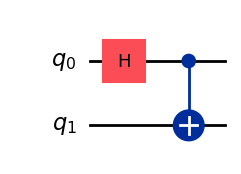

Qubit 0 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


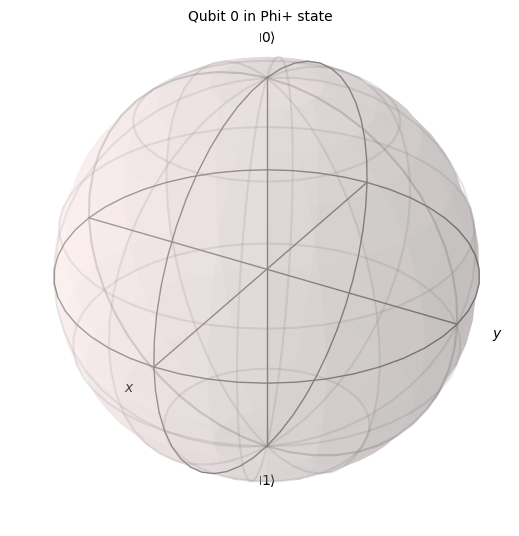

Qubit 1 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


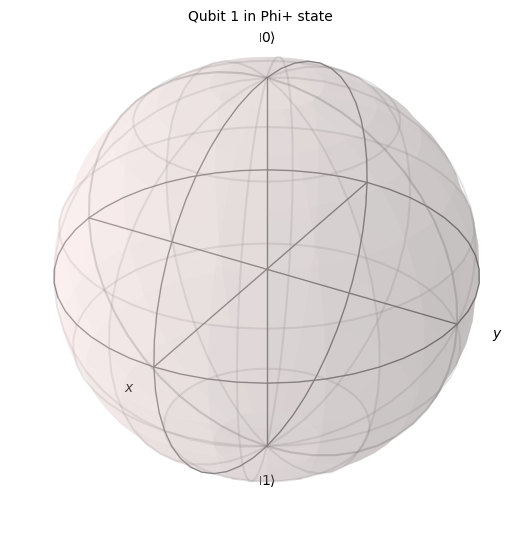

=== Phi- State ===


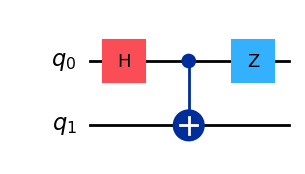

Qubit 0 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


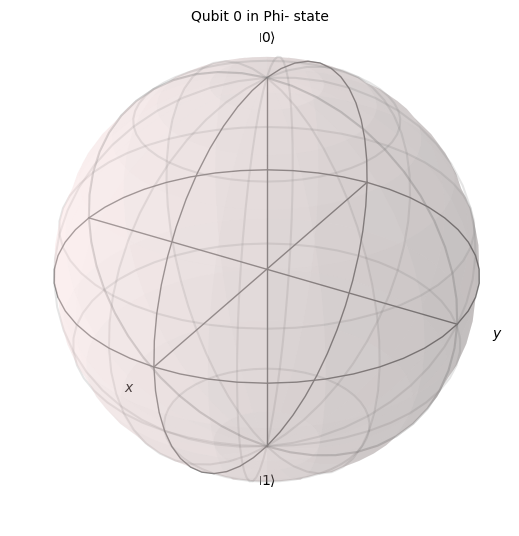

Qubit 1 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


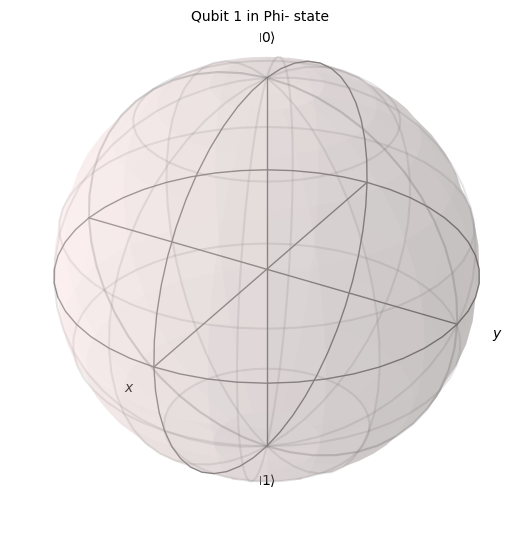

=== Psi+ State ===


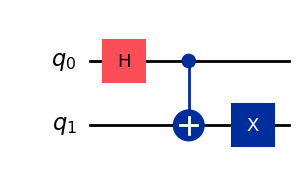

Qubit 0 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


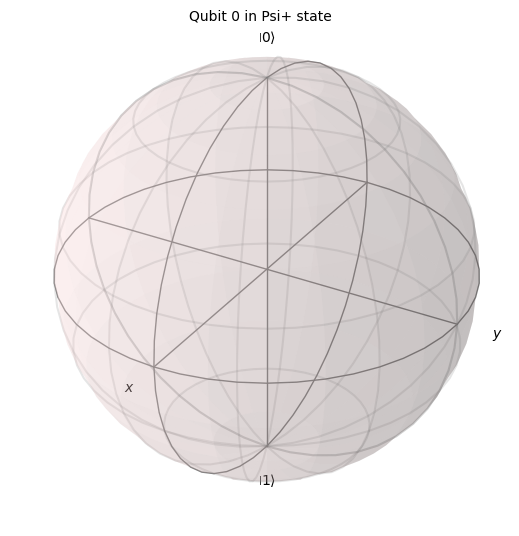

Qubit 1 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


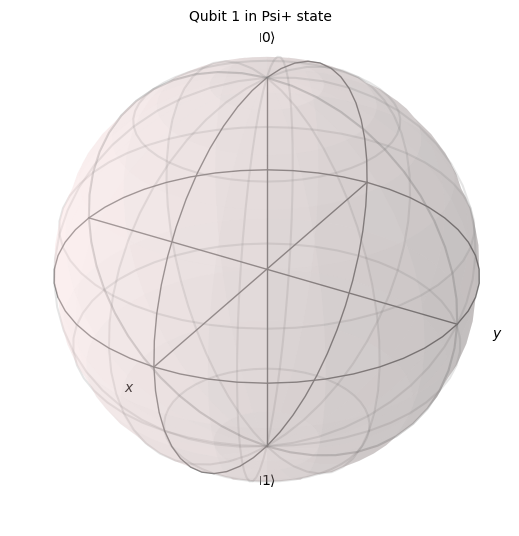

=== Psi- State ===


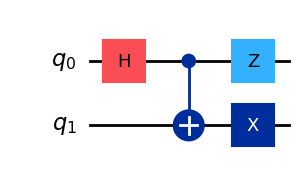

Qubit 0 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


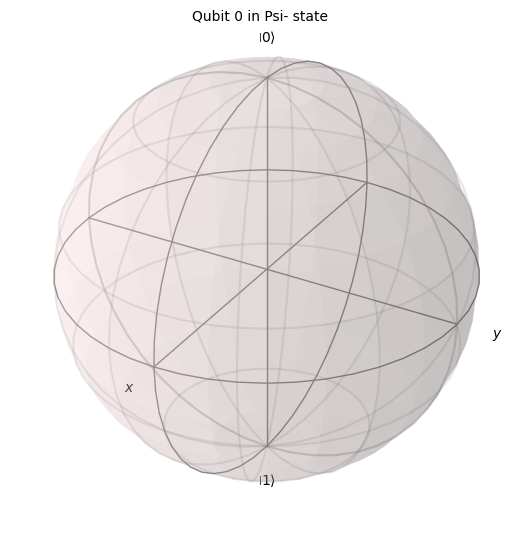

Qubit 1 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


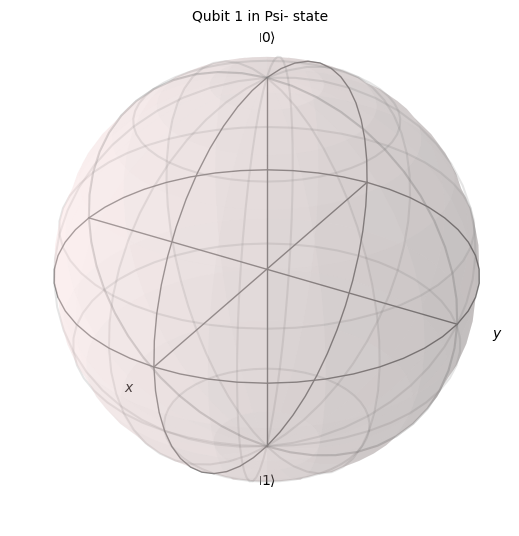

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector, partial_trace
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def create_bell_state(label):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)

    if label == 'Phi-':
        qc.z(0)
    elif label == 'Psi+':
        qc.x(1)
    elif label == 'Psi-':
        qc.x(1)
        qc.z(0)

    return qc

def get_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

bell_labels = ['Phi+', 'Phi-', 'Psi+', 'Psi-']

for label in bell_labels:
    print(f"=== {label} State ===")

    qc = create_bell_state(label)
    sv = Statevector.from_instruction(qc)

    display(circuit_drawer(qc, output='mpl', style='iqp'))

    meas_circ = qc.copy()
    meas_circ.measure_all()
    sim = AerSimulator()
    result = sim.run(meas_circ, shots=1024).result()
    counts = result.get_counts()

    plot_histogram(counts, title=f"{label} Measurement Histogram")
    plt.show()

    for qubit in range(2):
        reduced_rho = partial_trace(sv, [1 - qubit]).data
        bloch_vec = get_bloch_vector(reduced_rho)
        print(f"Qubit {qubit} Bloch Vector: {bloch_vec}")
        fig = plot_bloch_vector(bloch_vec, title=f"Qubit {qubit} in {label} state")
        display(fig)


=== Initial Qubits (|0⟩) Bloch Vectors ===
Qubit 0 Bloch Vector: [np.int64(0), np.int64(0), np.int64(1)]


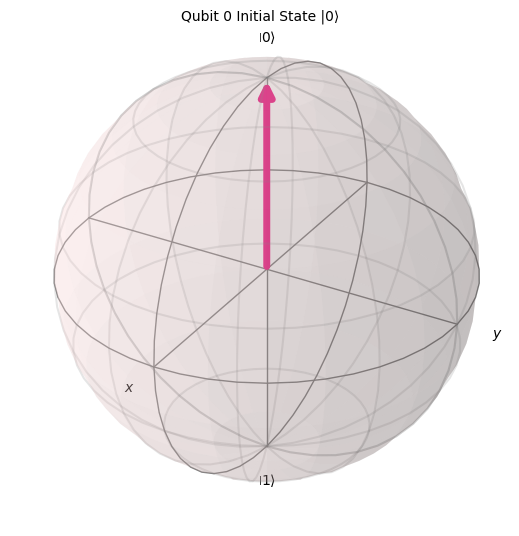

Qubit 1 Bloch Vector: [np.int64(0), np.int64(0), np.int64(1)]


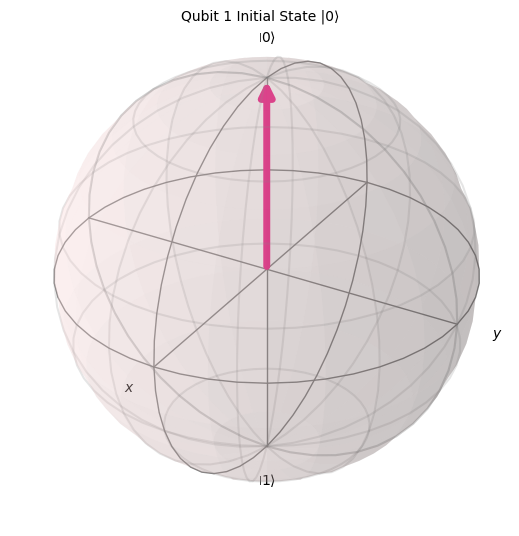

=== Phi+ State ===


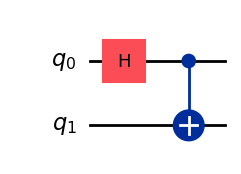

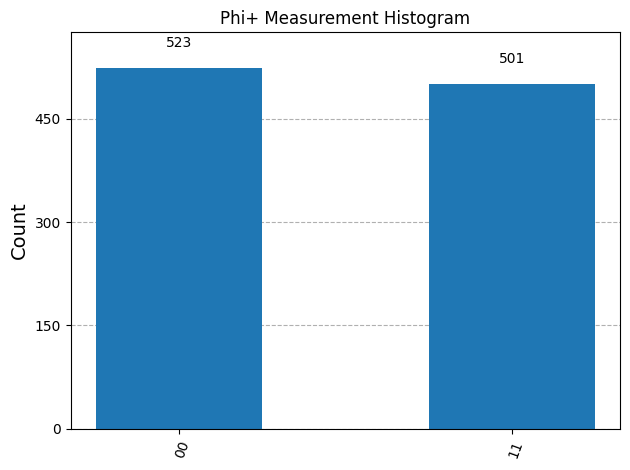

Qubit 0 Bloch Vector (after Phi+ state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


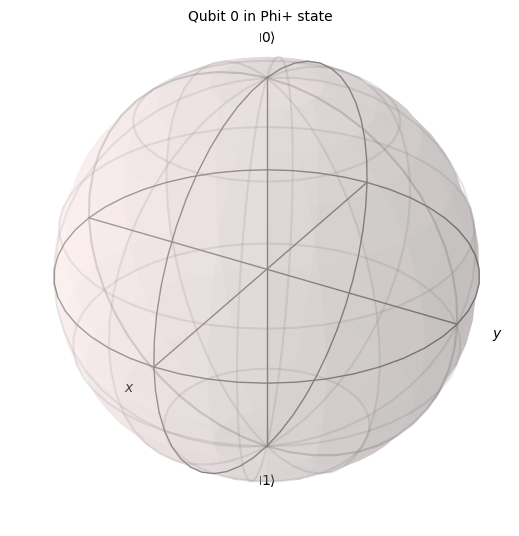

Qubit 1 Bloch Vector (after Phi+ state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


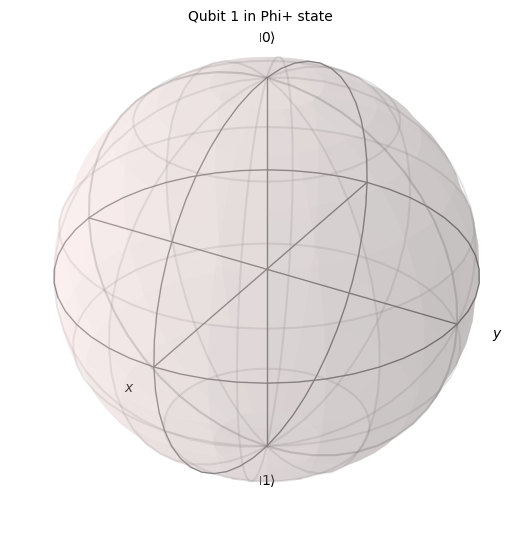

=== Phi- State ===


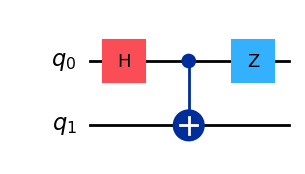

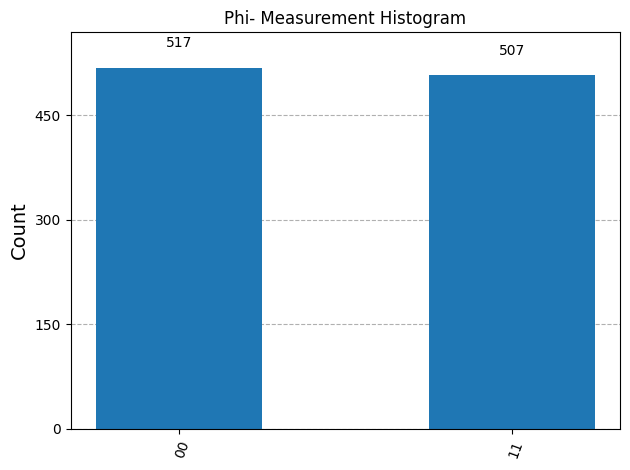

Qubit 0 Bloch Vector (after Phi- state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


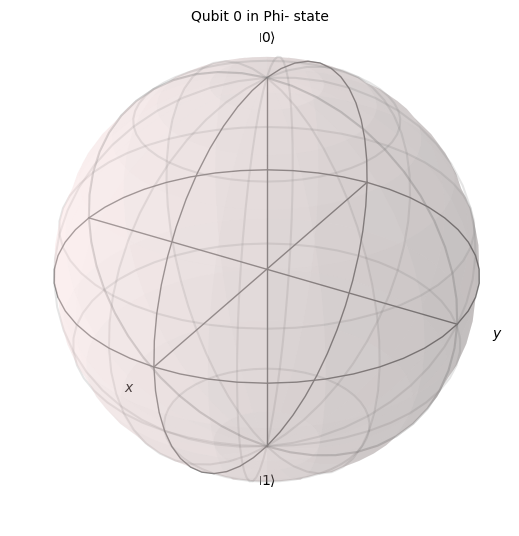

Qubit 1 Bloch Vector (after Phi- state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


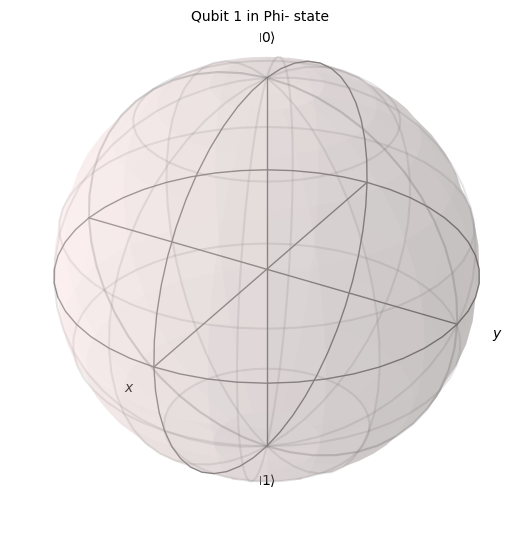

=== Psi+ State ===


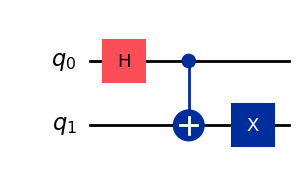

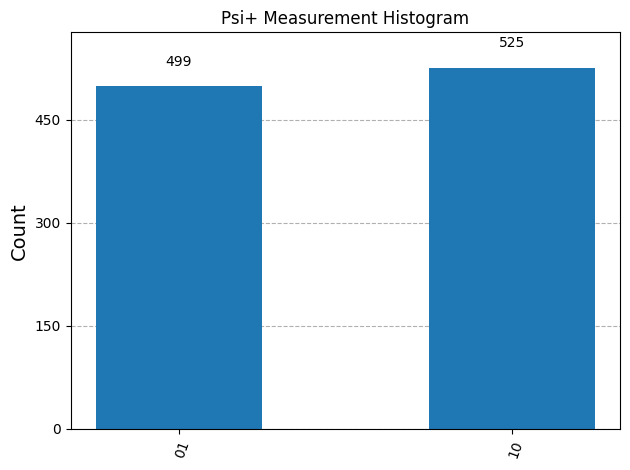

Qubit 0 Bloch Vector (after Psi+ state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


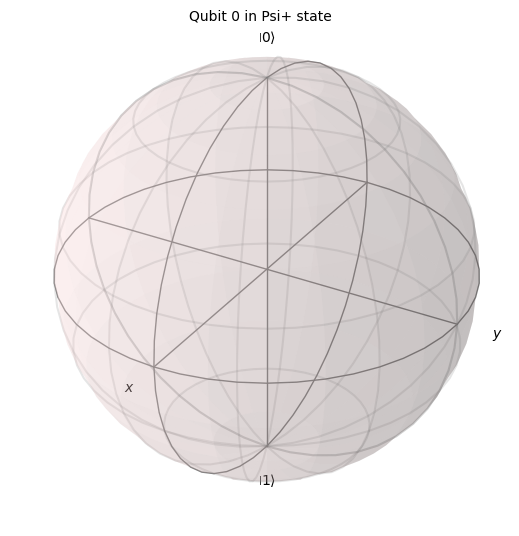

Qubit 1 Bloch Vector (after Psi+ state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


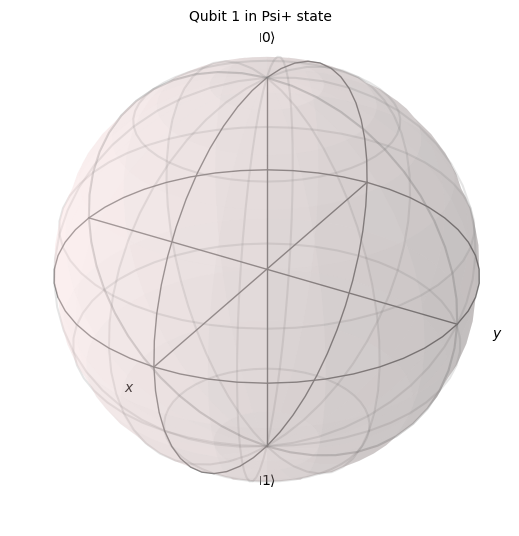

=== Psi- State ===


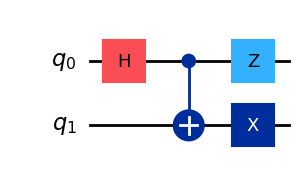

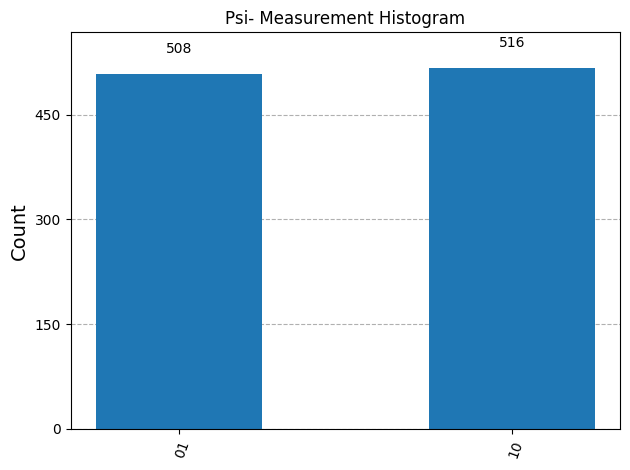

Qubit 0 Bloch Vector (after Psi- state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


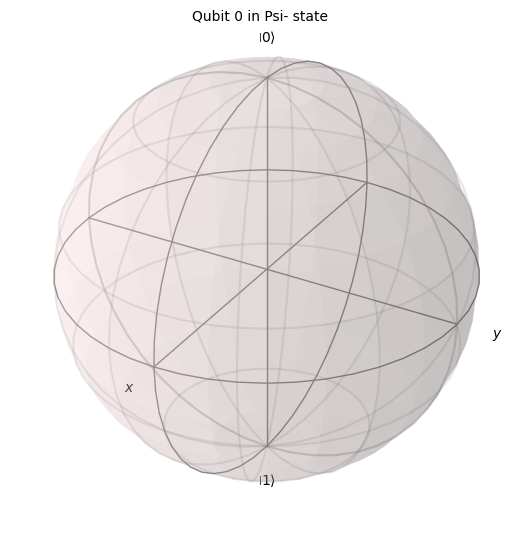

Qubit 1 Bloch Vector (after Psi- state): [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


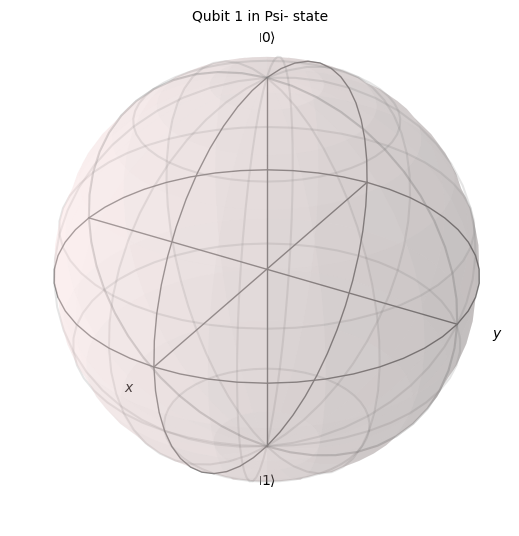

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector, partial_trace
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def get_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

def plot_initial_bloch_vectors(num_qubits=2):
    print("=== Initial Qubits (|0⟩) Bloch Vectors ===")
    for qubit in range(num_qubits):
        rho_0 = np.array([[1, 0], [0, 0]])
        bloch_vec = get_bloch_vector(rho_0)
        print(f"Qubit {qubit} Bloch Vector: {bloch_vec}")
        fig = plot_bloch_vector(bloch_vec, title=f"Qubit {qubit} Initial State |0⟩")
        display(fig)

def create_bell_state(label):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)

    if label == 'Phi-':
        qc.z(0)
    elif label == 'Psi+':
        qc.x(1)
    elif label == 'Psi-':
        qc.x(1)
        qc.z(0)

    return qc

plot_initial_bloch_vectors(2)

bell_labels = ['Phi+', 'Phi-', 'Psi+', 'Psi-']

for label in bell_labels:
    print(f"=== {label} State ===")

    qc = create_bell_state(label)
    sv = Statevector.from_instruction(qc)

    display(circuit_drawer(qc, output='mpl', style='iqp'))

    meas_circ = qc.copy()
    meas_circ.measure_all()
    sim = AerSimulator()
    result = sim.run(meas_circ, shots=1024).result()
    counts = result.get_counts()

    plot_hist = plot_histogram(counts, title=f"{label} Measurement Histogram")
    display(plot_hist)

    for qubit in range(2):
        reduced_rho = partial_trace(sv, [1 - qubit]).data
        bloch_vec = get_bloch_vector(reduced_rho)
        print(f"Qubit {qubit} Bloch Vector (after {label} state): {bloch_vec}")
        fig = plot_bloch_vector(bloch_vec, title=f"Qubit {qubit} in {label} state")
        display(fig)


**PENNYLANE CODE**

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 61.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


=== Phi+ State ===
0: ──H─╭●─┤ ╭Sample
1: ────╰X─┤ ╰Sample


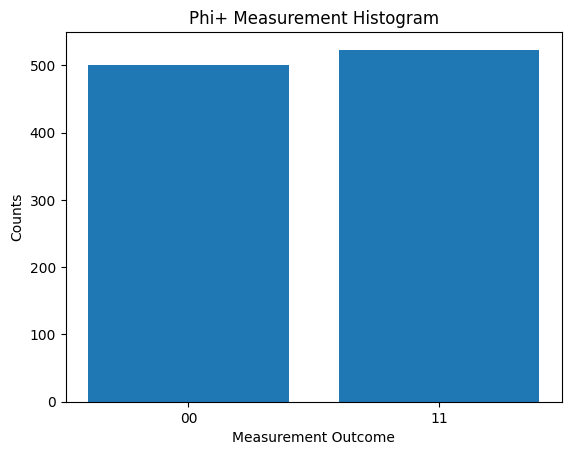

=== Phi- State ===
0: ──H─╭●──Z─┤ ╭Sample
1: ────╰X────┤ ╰Sample


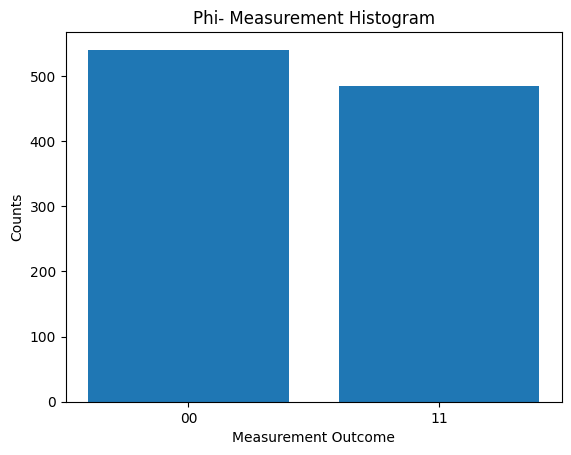

=== Psi+ State ===
0: ──H─╭●────┤ ╭Sample
1: ────╰X──X─┤ ╰Sample


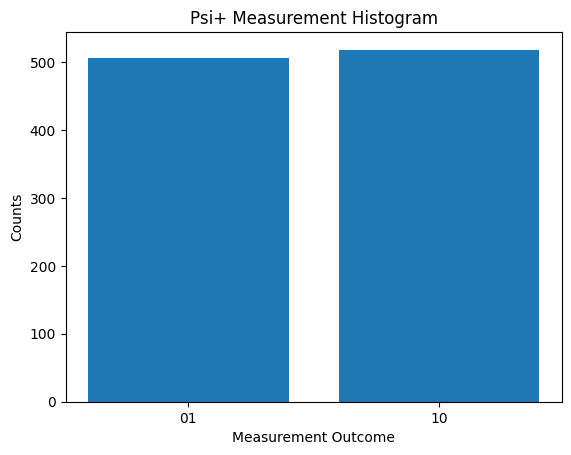

=== Psi- State ===
0: ──H─╭●──Z─┤ ╭Sample
1: ────╰X──X─┤ ╰Sample


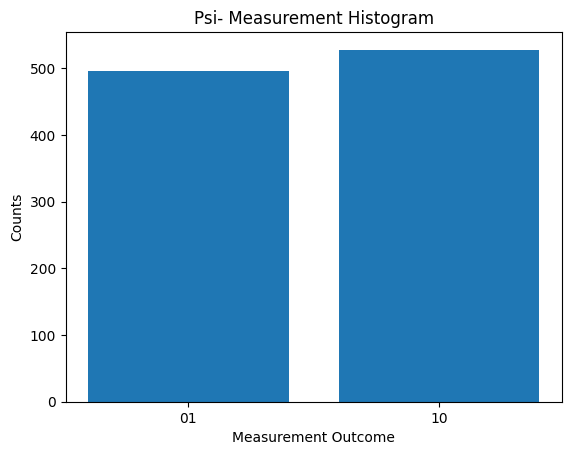

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=2, shots=1024)

def create_bell_state(label):
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0, 1])

        if label == 'Phi-':
            qml.PauliZ(wires=0)
        elif label == 'Psi+':
            qml.PauliX(wires=1)
        elif label == 'Psi-':
            qml.PauliX(wires=1)
            qml.PauliZ(wires=0)

        return qml.sample(wires=[0, 1])

    return circuit

bell_labels = ['Phi+', 'Phi-', 'Psi+', 'Psi-']

for label in bell_labels:
    print(f"=== {label} State ===")
    circuit = create_bell_state(label)

    drawn_circuit = qml.draw(circuit)()
    print(drawn_circuit)


    results = circuit()


    bitstrings = ["".join(str(bit) for bit in row) for row in results]
    counts = {}
    for b in bitstrings:
        counts[b] = counts.get(b, 0) + 1


    plt.bar(counts.keys(), counts.values())
    plt.title(f"{label} Measurement Histogram")
    plt.xlabel("Measurement Outcome")
    plt.ylabel("Counts")
    plt.show()


**GOOGLE CIRQ CODE**

In [ ]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.9 MB/s eta 0:00:00



=== Phi+ State ===
0: ───H───@───M('result')───
          │   │
1: ───────X───M─────────────


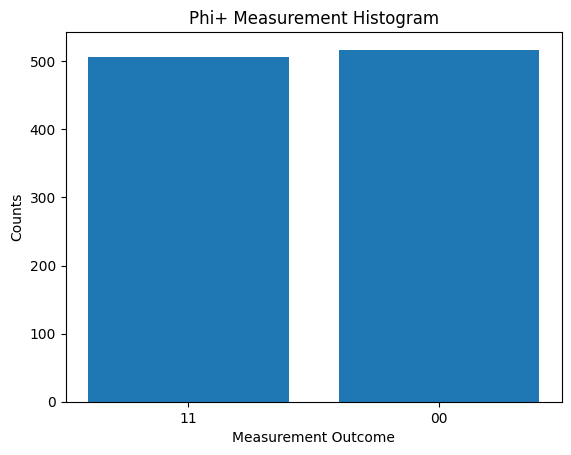


=== Phi- State ===
0: ───H───@───Z───M('result')───
          │       │
1: ───────X───────M─────────────


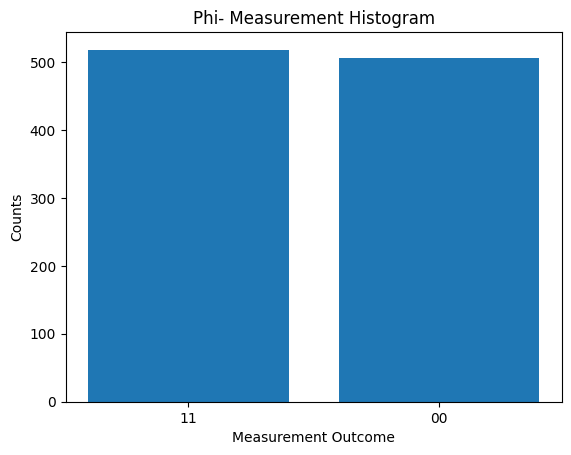


=== Psi+ State ===
0: ───H───@───────M('result')───
          │       │
1: ───────X───X───M─────────────


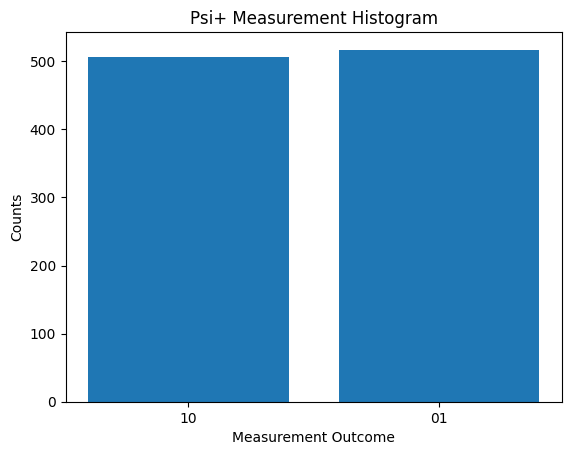


=== Psi- State ===
0: ───H───@───Z───M('result')───
          │       │
1: ───────X───X───M─────────────


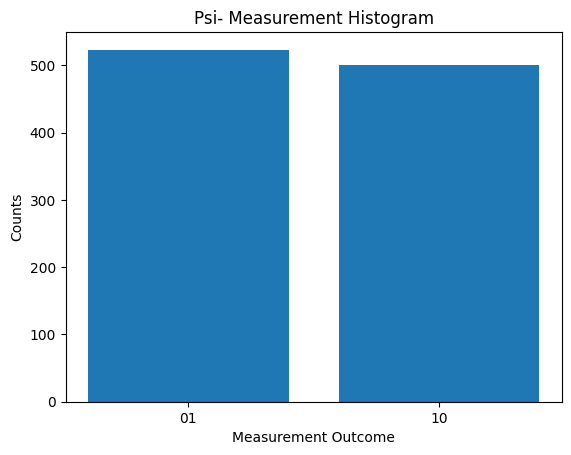

In [ ]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def create_bell_circuit(label):
    q0, q1 = cirq.LineQubit.range(2)
    circuit = cirq.Circuit()

    circuit.append(cirq.H(q0))
    circuit.append(cirq.CNOT(q0, q1))

    if label == 'Phi-':
        circuit.append(cirq.Z(q0))
    elif label == 'Psi+':
        circuit.append(cirq.X(q1))
    elif label == 'Psi-':
        circuit.append([cirq.X(q1), cirq.Z(q0)])

    circuit.append(cirq.measure(q0, q1, key='result'))
    return circuit, [q0, q1]


bell_labels = ['Phi+', 'Phi-', 'Psi+', 'Psi-']

simulator = cirq.Simulator()

for label in bell_labels:
    print(f"\n=== {label} State ===")

    circuit, qubits = create_bell_circuit(label)
    print(circuit)

    result = simulator.run(circuit, repetitions=1024)
    measurements = result.measurements['result']

    bitstrings = [''.join(str(bit) for bit in reversed(meas)) for meas in measurements]
    counts = Counter(bitstrings)

    plt.bar(counts.keys(), counts.values())
    plt.title(f"{label} Measurement Histogram")
    plt.xlabel("Measurement Outcome")
    plt.ylabel("Counts")
    plt.show()
